<a href="https://colab.research.google.com/github/shreyans312/CSoT-AI-DevClub/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week-2**
**Objective:**


*   Additional Feature Preparation (Sentiment Score, char_count, encode company names)
*   Train the ML model
*   Building API




In [1]:
#Importing libraries and reading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1JcESl7qCCBvS6xpWMZplhCXunvmkcNU_/export?format=csv")
orig_shape = df.shape
print("Shape of dataset:", orig_shape)
df.head()
df.info()
df.isnull().sum()

Shape of dataset: (17331, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


# **Data Processing**

In [2]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['datetime'])

print("Processing Complete !")
print("Original Shape:", orig_shape)
print("New Shape:", df.shape)
print("No. of rows removed:", orig_shape[0] - df.shape[0])

<ipython-input-2-1937236919>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


Processing Complete !
Original Shape: (17331, 7)
New Shape: (17331, 9)
No. of rows removed: 0


# **Data Analysis and Planning**

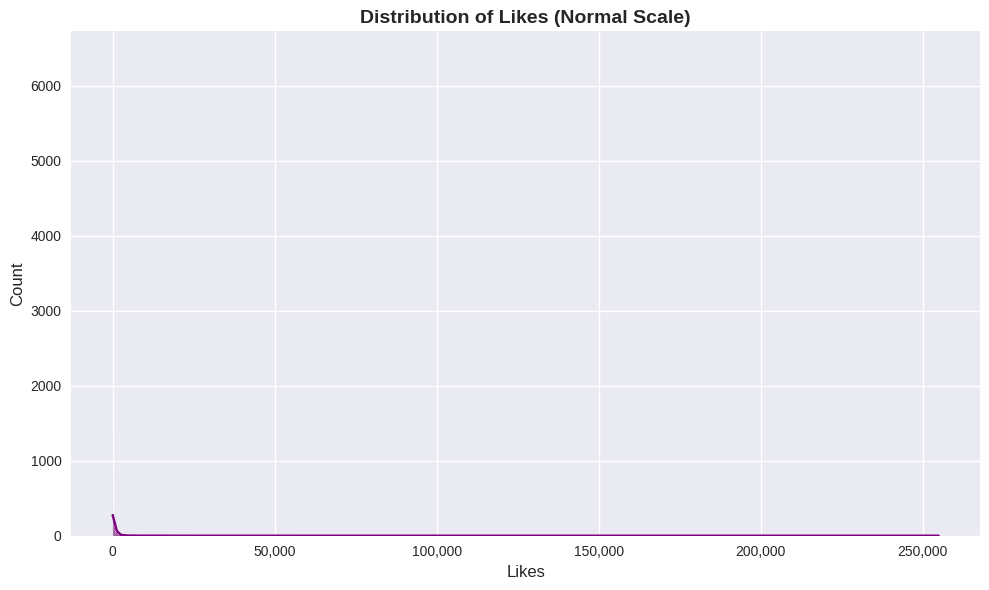

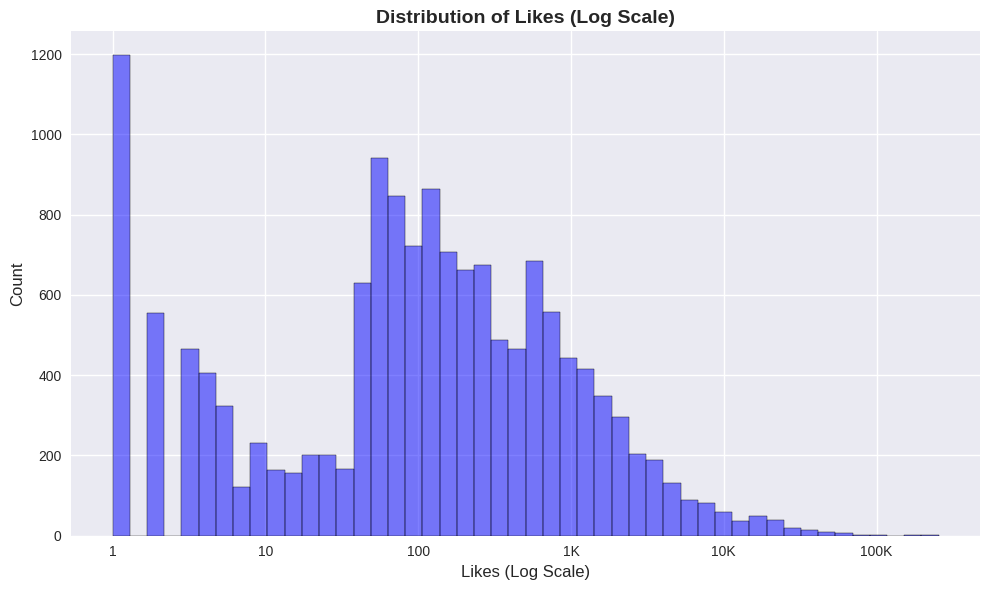

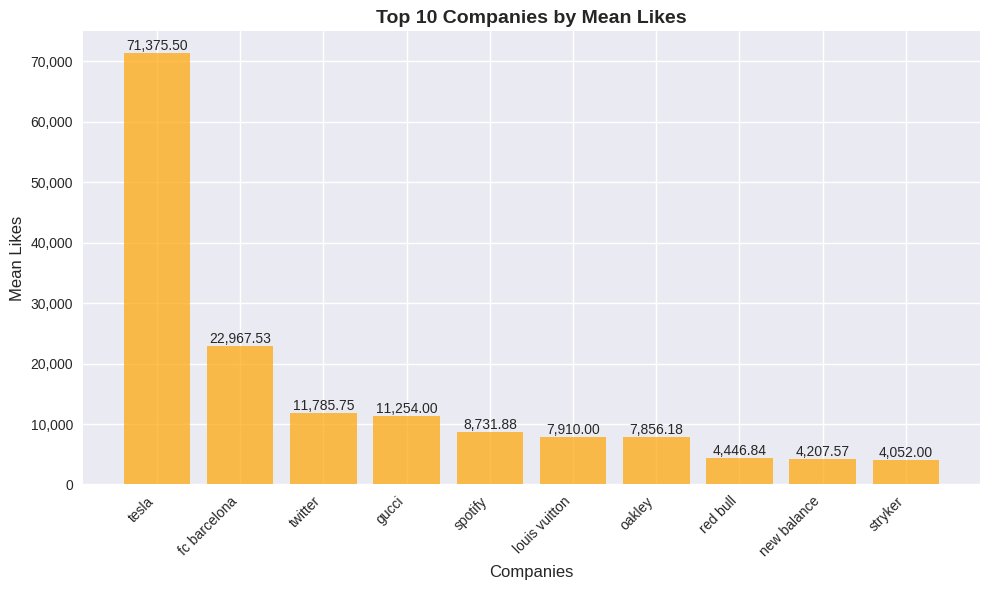

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], kde=True, color='purple')
plt.title('Distribution of Likes (Normal Scale)', fontweight='bold', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()
plt.close()


plt.figure(figsize=(10, 6))
sns.histplot(df['likes'], kde=True, color='blue', log_scale=True)
plt.title('Distribution of Likes (Log Scale)', fontweight='bold', fontsize=14)
plt.xlabel('Likes (Log Scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.gca().set_xticks([1, 10, 100, 1000, 10000, 100000])
plt.gca().set_xticklabels(['1', '10', '100', '1K', '10K', '100K'])
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
comp_likes = df.groupby('inferred company')['likes'].agg(['mean', 'count']).reset_index()
top_comp = comp_likes.nlargest(10, 'mean')
bar = plt.bar(range(len(top_comp)), top_comp['mean'], color='orange', alpha=0.7)
plt.gca().set_xticks(range(len(top_comp)))
plt.gca().set_xticklabels(top_comp['inferred company'], rotation=45, ha='right', fontsize=10)
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Mean Likes', fontsize=12)
plt.title('Top 10 Companies by Mean Likes', fontweight='bold', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='both', labelsize=10)
for i, b in enumerate(bar):
    height = b.get_height()
    plt.annotate(f'{height:,.2f}', xy=(i, height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()
plt.close()

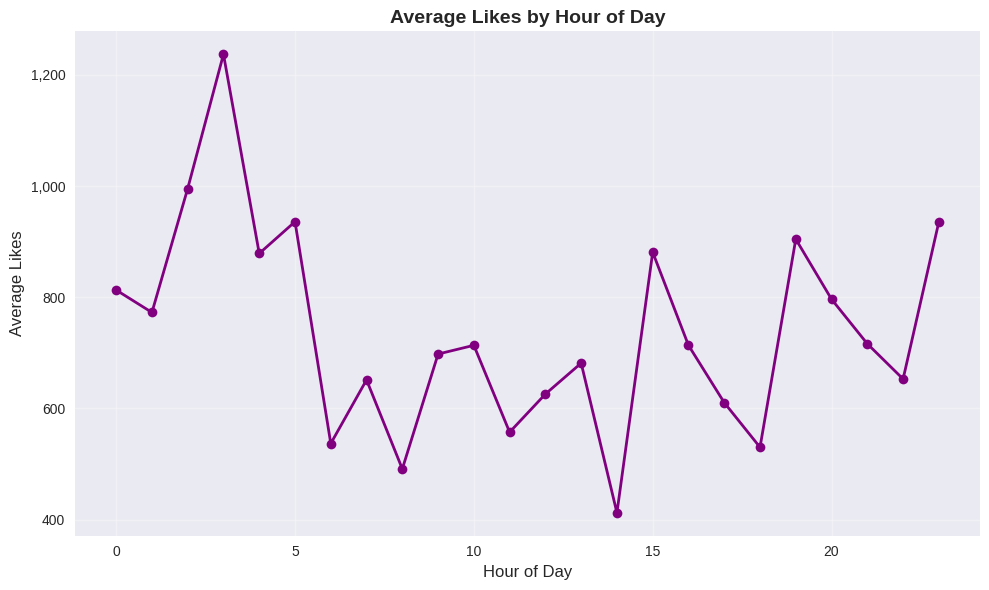

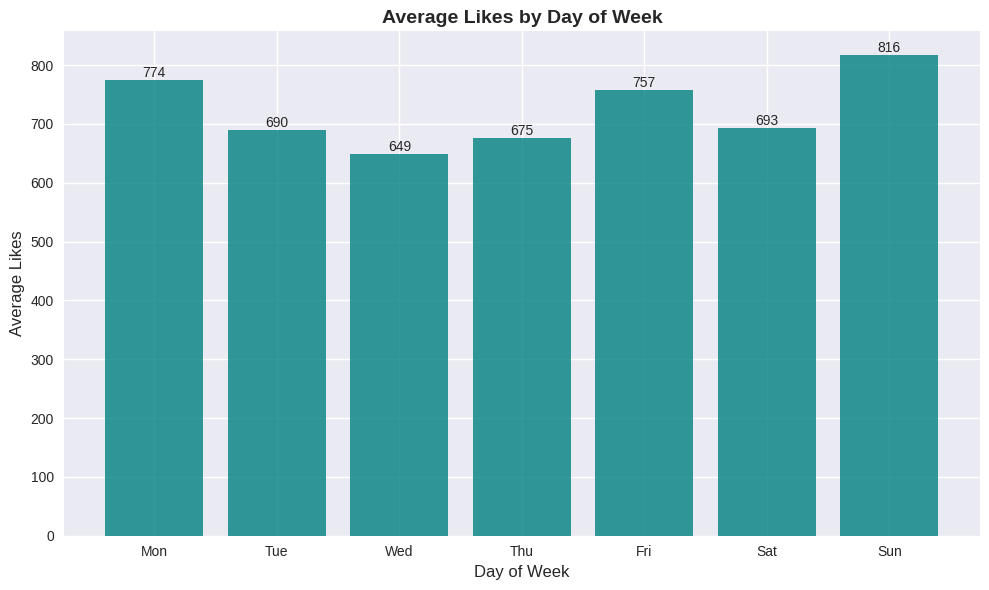

In [4]:
# Time analysis with likes
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

plt.figure(figsize=(10, 6))
hourly_likes = df.groupby('hour')['likes'].mean()
plt.plot(hourly_likes.index, hourly_likes.values, marker='o', color='purple', linewidth=2)
plt.title('Average Likes by Hour of Day', fontweight='bold', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Likes', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_likes = df.groupby('day_of_week')['likes'].mean().reindex(day_order)
bars = plt.bar(range(len(daily_likes)), daily_likes.values, color='teal', alpha=0.8)
plt.title('Average Likes by Day of Week', fontweight='bold', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Likes', fontsize=12)
plt.gca().set_xticks(range(len(day_order)))
plt.gca().set_xticklabels([day[:3] for day in day_order], fontsize=10)
plt.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()
plt.close()


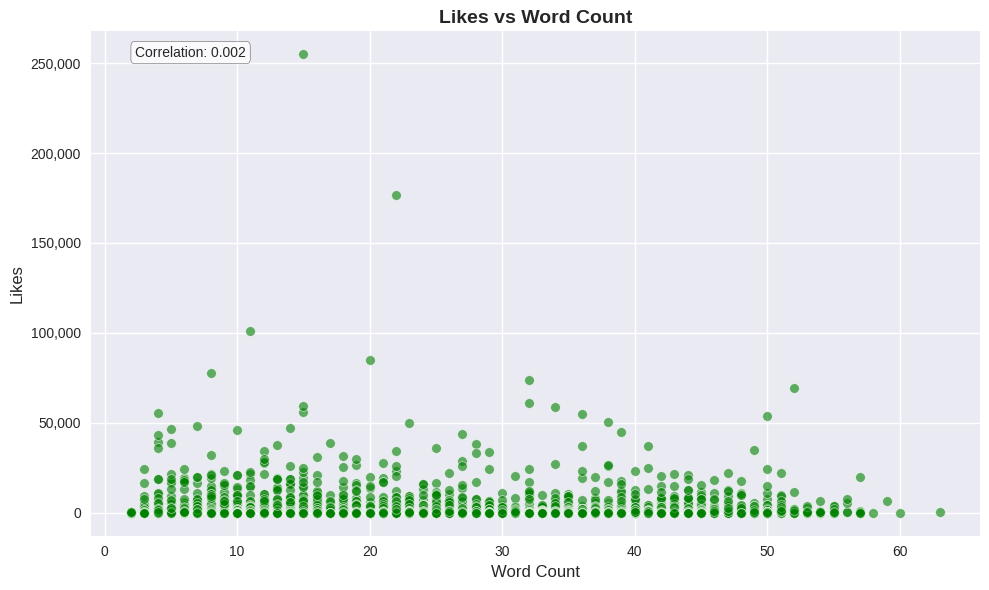

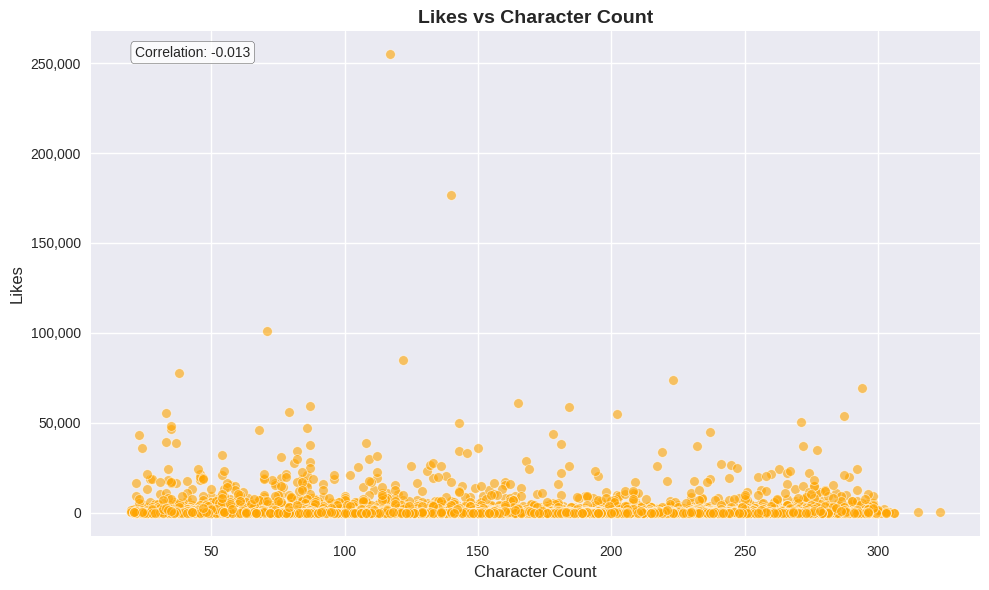

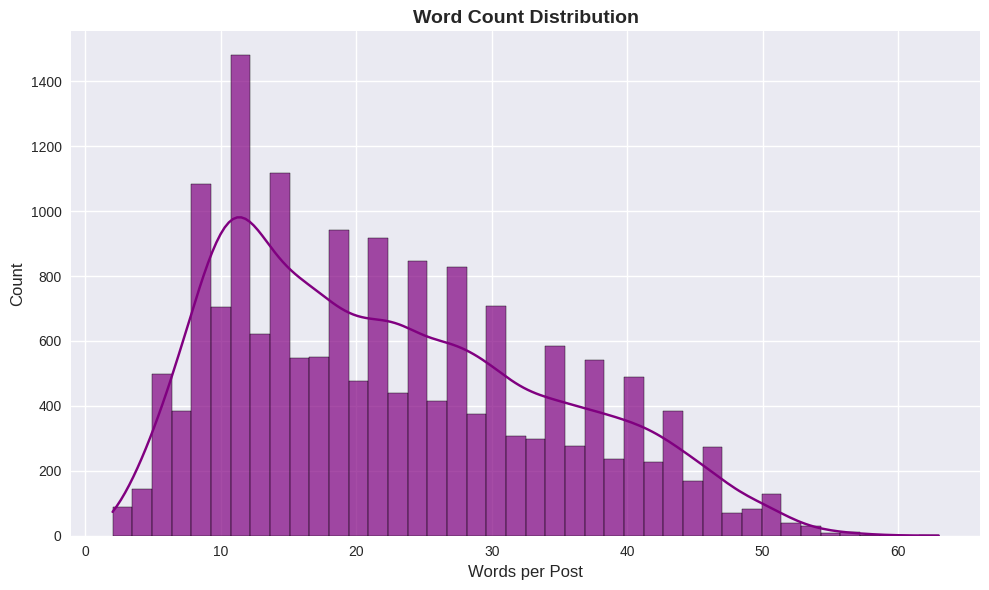

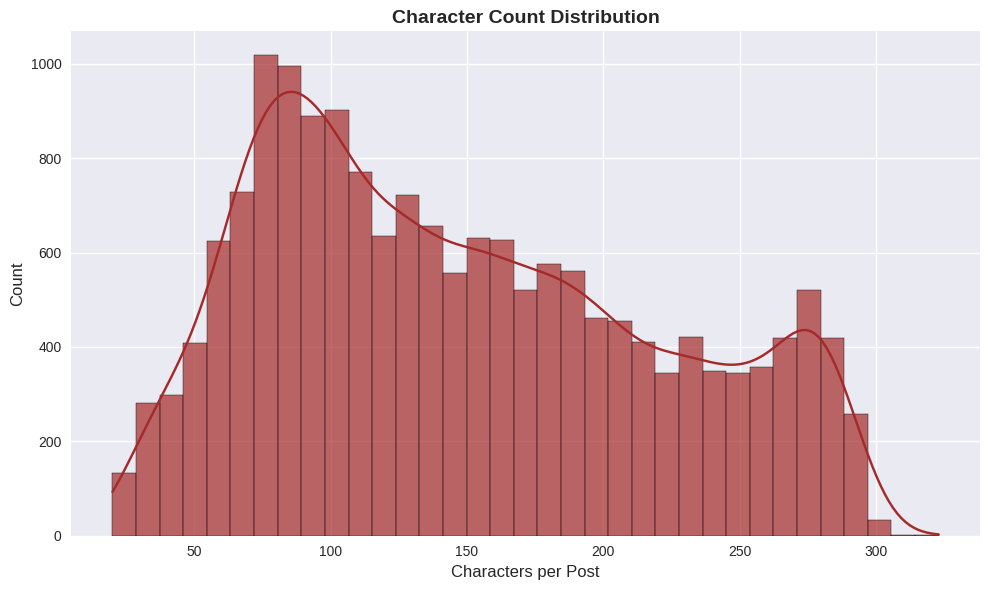

In [5]:
# Analysis of words with likes/posts
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='likes', alpha=0.6, color='green')
plt.title('Likes vs Word Count', fontweight='bold', fontsize=14)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
corr_coef = df['word_count'].corr(df['likes'])
plt.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8), fontsize=10)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='char_count', y='likes', alpha=0.6, color='orange')
plt.title('Likes vs Character Count', fontweight='bold', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
corr_coef = df['char_count'].corr(df['likes'])
plt.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8), fontsize=10)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, color='purple', alpha=0.7)
plt.title('Word Count Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Words per Post', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(10, 6))
sns.histplot(df['char_count'], kde=True, color='brown', alpha=0.7)
plt.title('Character Count Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Characters per Post', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.tight_layout()
plt.show()
plt.close()

# **Additional Features Preparation**


*   Sentiment analysis
*   char_count
*   Encode company names
*   Emojis count
*   Has Hashtag
*   Has url
*   Avg likes grouped by company
*   TF-IDF (Does not help reduce the RMSE so removed)
*   Log for likes and 99th percentile cap for accounting skewness





In [6]:
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
df['char_count'] = df['content'].apply(len)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['inferred company'])

In [9]:
!pip install emoji
import emoji
def emoji_counter(text):
  return len([char for char in str(text) if char in emoji.EMOJI_DATA])

df['emoji_count'] = df['content'].apply(emoji_counter)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.2 MB/s eta 0:00:00


In [10]:
df['has_hashtag'] = df['content'].str.contains('#', na=False).astype(int)
df['has_url'] = df['content'].str.contains('http', na=False).astype(int)

In [11]:
df['company_avg_likes'] = df['inferred company'].map(df.groupby('inferred company')['likes'].mean().to_dict())

In [25]:
df['likes_capped'] = df['likes'].clip(upper=df['likes'].quantile(0.99))
df['log_likes'] = np.log1p(df['likes_capped']) # Adding log of likes as a feature to account for skewness of the distribution

# **Model Training**

In [26]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['word_count', 'char_count', 'has_media', 'hour', 'sentiment', 'emoji_count', 'has_hashtag', 'has_url', 'company_avg_likes']]
y = df['log_likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

preds = np.expm1(model.predict(X_test_scaled))
y_test_orig = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_orig, preds))
print("RMSE:", rmse)

RMSE: 1395.1170734282023


# Saving the Model

In [27]:
import joblib
joblib.dump(model, 'like_predictor.pkl')

['like_predictor.pkl']

# **Feature explanation and model improvements**
I have used the features ('word_count', 'char_count', 'has_media', 'hour', 'sentiment', 'emoji_count', 'has_hashtag', 'has_url') in my current approach. I have also used the standard scaler for feature scaling.
Currently the RMSE is around 1400.
I tried several other features and approaches as well (for eg: adding tf-idf does not help at all in current model and also adding the 99th percentile cap as well as log on likes data helped significantly reduce the rmse from around 4000 to under 1500)

For further improvements we can add hyperparameter tuning using RandomizedSearchCV or use some other modelling technique like GradientBoosterRegressor which uses a quantile regression approach.
